<a href="https://colab.research.google.com/github/jyotsana700/Spaceship_Titanic/blob/main/EDA_spaceshipTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spaceship Titanic

## All the Lifecycle In A Data Science Projects

#### 1.Data Analysis
#### 2.Feature Engineering
#### 3.Feature Selection
#### 4.Model Building

In [100]:
## Data Analysis Phase
## Main aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

### Exploratory Data Analysis

In [101]:
dataset_train=pd.read_csv('train.csv')
dataset_test=pd.read_csv('test.csv')

## print shape of dataset with rows and columns
print(dataset_train.shape)
print(dataset_test.shape)

(8693, 14)
(4277, 13)


In [105]:
df = pd.concat([dataset_train, dataset_test], axis=0).reset_index(drop=True)

In [104]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [106]:
df.shape

(12970, 14)

In [ ]:
data=df.copy()
Transported1=[]
for i in data['Transported']:
  if i==False:
    Transported1.append(0)
  else:
    Transported1.append(1)

In [ ]:
del data['Transported']

In [ ]:
Transport= pd.DataFrame(Transported1)
Transport.columns=['transport']

In [ ]:
dataframe = pd.concat([data, Transport], axis=1).reset_index(drop=True)

In [ ]:
dataframe

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,transport
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,1
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,1


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables


## Missing Values

#### We try to find how many missing values are present with respect to each and every feature. By using list comprehension, we will find all the features with missing values. Then we will find out missing values percentage for each feature

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  transport     12970 non-null  int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 1.4+ MB


In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataframe.columns if dataframe[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataframe[feature].isnull().mean(), 4),  ' % missing values')

HomePlanet 0.0222  % missing values
CryoSleep 0.0239  % missing values
Cabin 0.0231  % missing values
Destination 0.0211  % missing values
Age 0.0208  % missing values
VIP 0.0228  % missing values
RoomService 0.0203  % missing values
FoodCourt 0.0223  % missing values
ShoppingMall 0.0236  % missing values
Spa 0.0219  % missing values
VRDeck 0.0207  % missing values
Name 0.0227  % missing values


### Since they are many missing values, we need to find the relationship between missing values and Transported.

Let's plot some diagram for this relationship

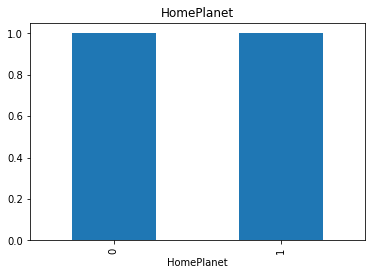

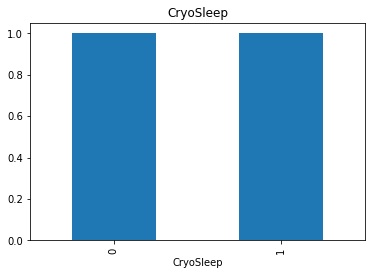

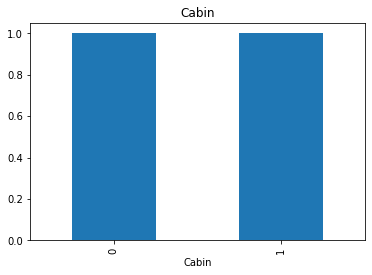

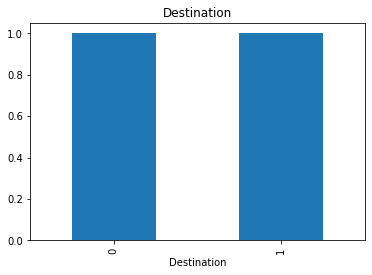

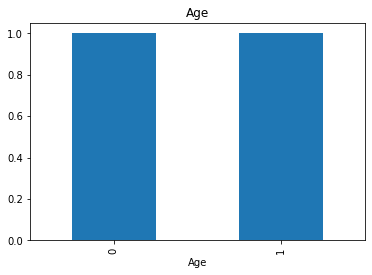

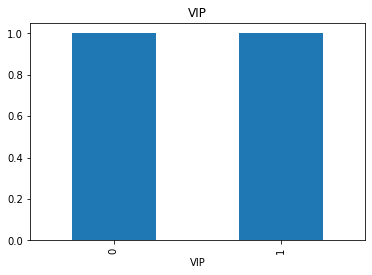

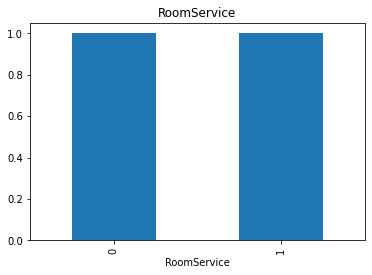

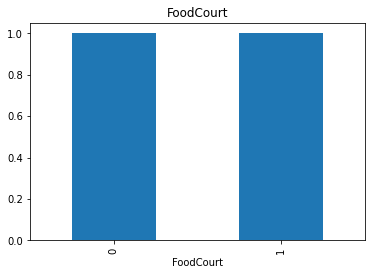

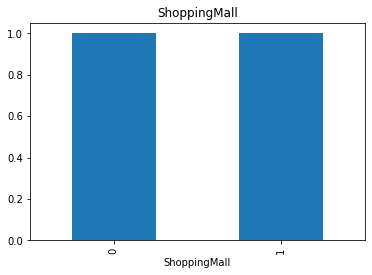

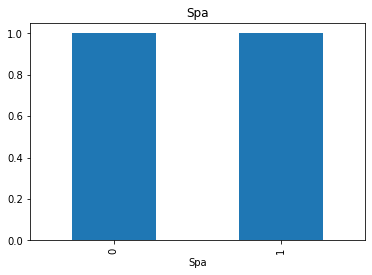

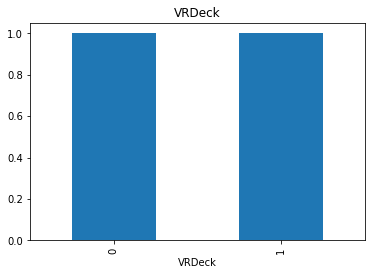

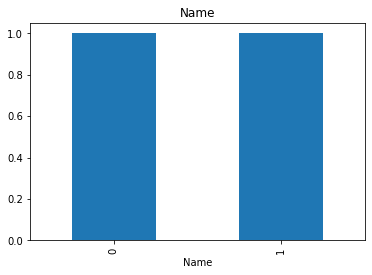

In [ ]:
for feature in features_with_na:
    data = dataframe.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean Transported where the information is missing or present
    data.groupby(feature)['transport'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [ ]:
print("Id of Passenger {}".format(len(dataframe.	PassengerId)))

Id of Passenger 12970


### Numerical Variables

By using list comprehension we will find out the features who have numerical variable. then show the length of numerical variable

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataframe.columns if dataframe[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataframe[numerical_features].head()

Number of numerical variables:  7


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,transport
0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1


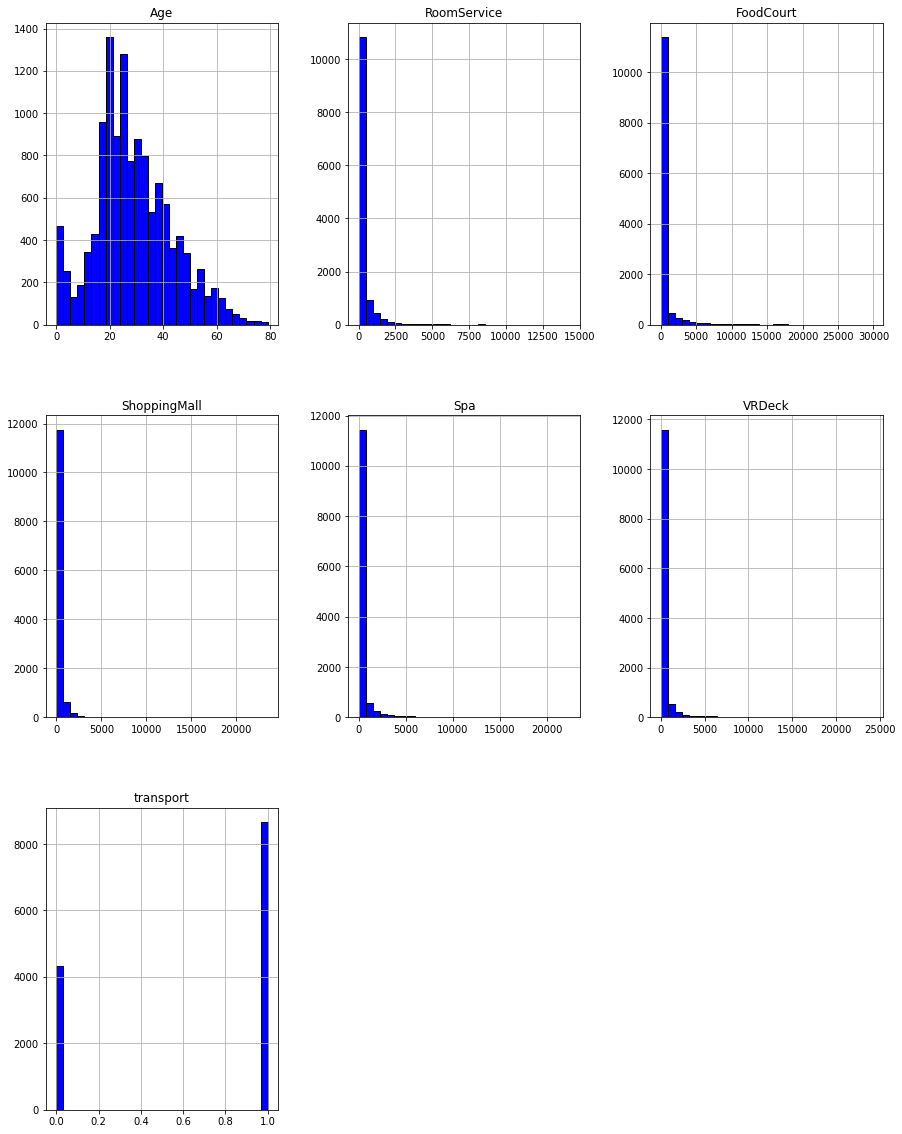

In [ ]:
dataframe[numerical_features].hist(figsize=(15,20), bins=30, color='blue', edgecolor='black');

Handling Numerical Features in the Data

In [ ]:
for feature in numerical_features:
    median_value = dataframe[feature].median()
    
    #create a new feature = feature_nan for every feature to capture NaN values
    dataframe[feature+'nan']=np.where(dataframe[feature].isnull(),1,0) #1 for missing value, 0 for non-missing values
    dataframe[feature].fillna(median_value, inplace=True)

In [ ]:
dataframe[numerical_features].isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
transport       0
dtype: int64

### Numerical variables are usually of 2 types:
#### Continous variable 
#### Discrete Variable

#### Discrete variable

In [ ]:
# discrete feature

discrete_feature=[feature for feature in numerical_features if len(dataframe[feature].unique())<25 and feature not in ['PassengerId']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [ ]:
discrete_feature

['transport']

Continous Feature

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['PassengerId']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 6


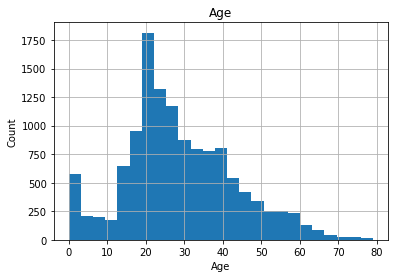

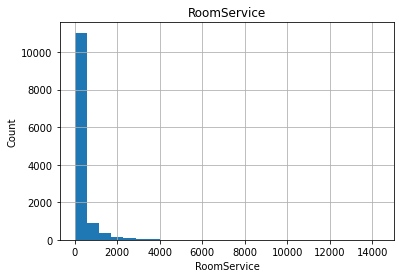

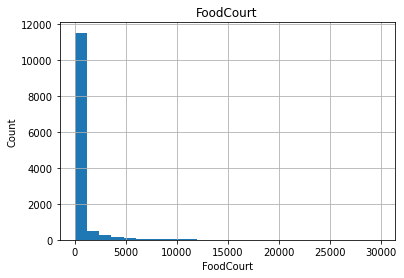

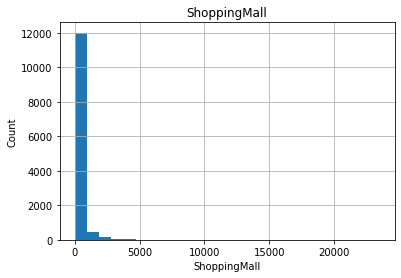

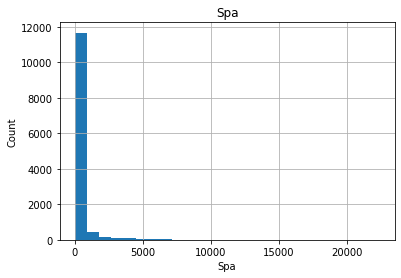

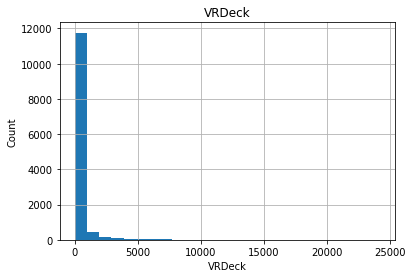

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

By above analysis we find that some of the features have gaussian distribution but other features does not have gausssian distribution, So it proved that it has Skewed data.

#### Logarithmic Transformation
Logarithmic Transformation is used to reduce the Skewness of Data. Also it can help convert Non-Linear model to Linear, as per requirement.We just have to apply the natural log transformation function of NumPy (numpy.log or np.log) to the values you want to log transform.

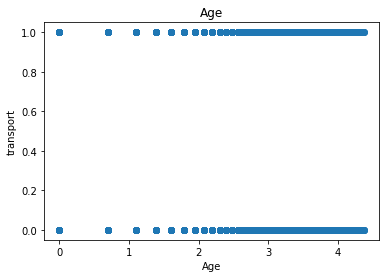

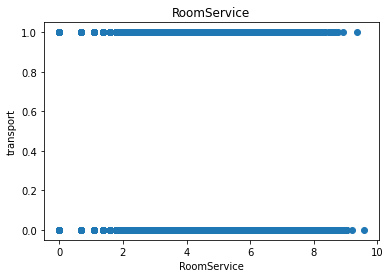

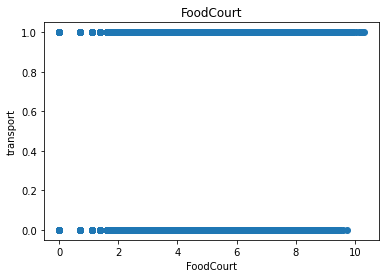

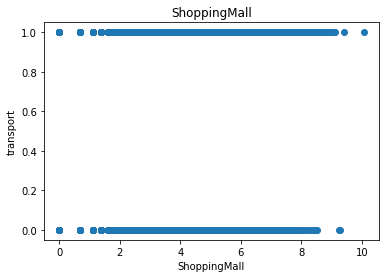

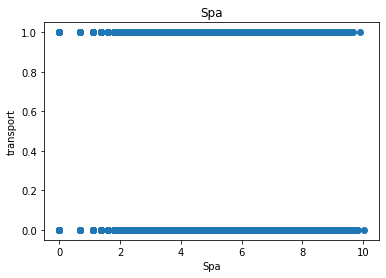

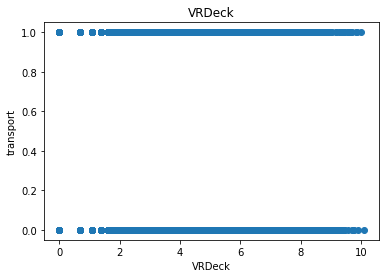

In [ ]:
## We will be using logarithmic transformation


for feature in continuous_feature:
        dataframe[feature]=np.log(dataframe[feature])
        # a['tra']=np.log(a['tra'])
        plt.scatter(dataframe[feature],dataframe['transport'])
        plt.xlabel(feature)
        plt.ylabel('transport')
        plt.title(feature)
        plt.show()

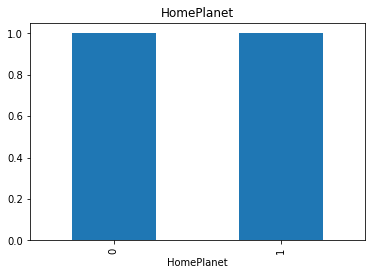

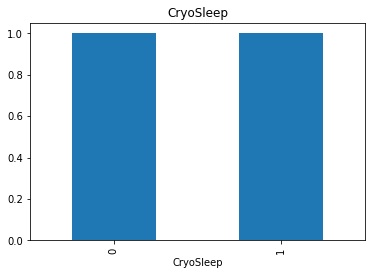

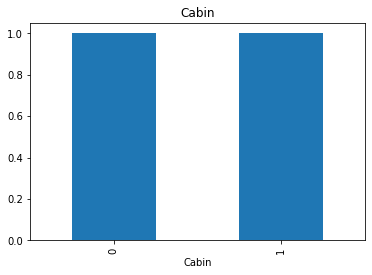

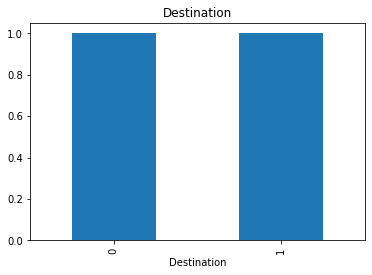

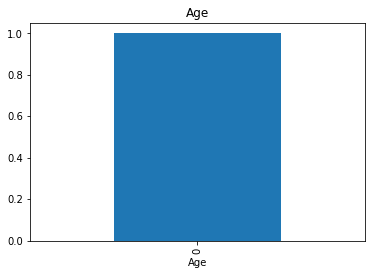

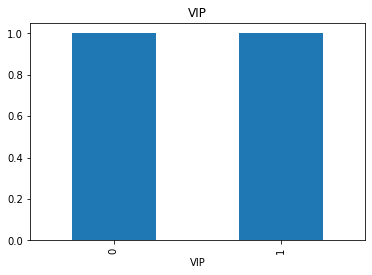

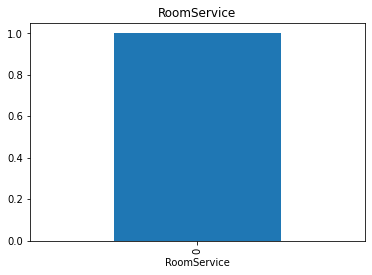

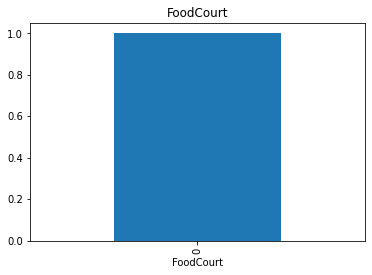

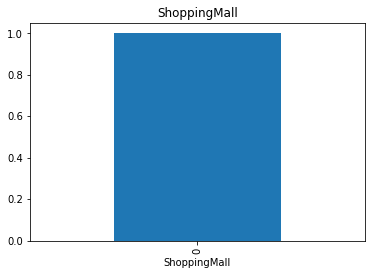

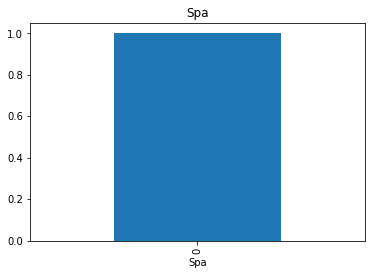

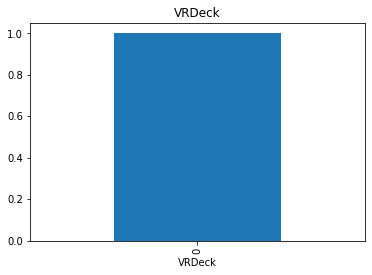

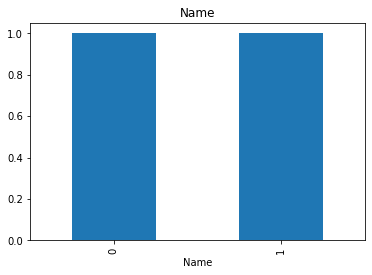

In [ ]:
for feature in features_with_na:
    data = dataframe.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean Transported where the information is missing or present
    data.groupby(feature)['transport'].median().plot.bar()
    plt.title(feature)
    plt.show()

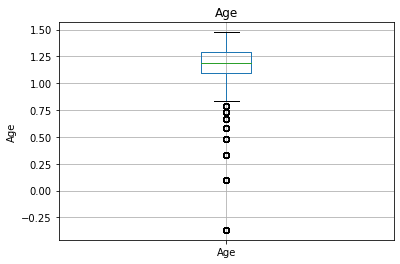

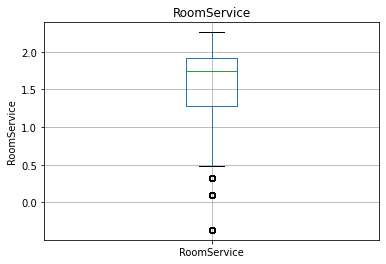

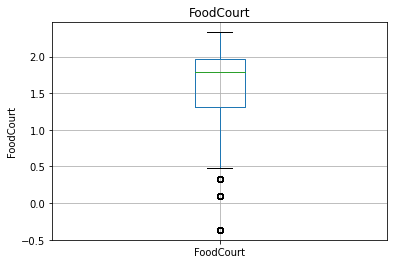

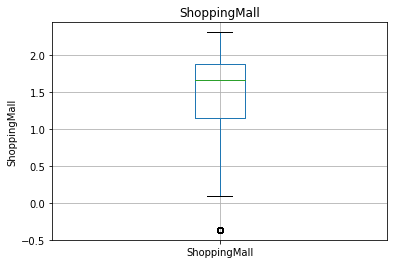

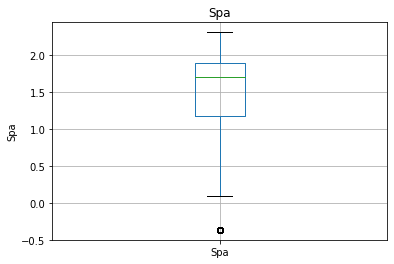

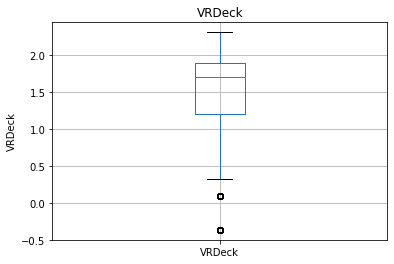

In [ ]:
# visualize the continuous feature using box plot
for feature in continuous_feature:
    data=dataframe.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Categorical Variables

In [ ]:
# list of categorical variables
categorical_features=[feature for feature in dataframe.columns if data[feature].dtypes=='O']
categorical_features

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [ ]:
dataframe[categorical_features].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


In [ ]:
#cardinality in categorical variable
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataframe[feature].unique())))

The feature is PassengerId and number of categories are 12970
The feature is HomePlanet and number of categories are 4
The feature is CryoSleep and number of categories are 3
The feature is Cabin and number of categories are 9826
The feature is Destination and number of categories are 4
The feature is VIP and number of categories are 3
The feature is Name and number of categories are 12630


In [ ]:
# Replace missing values with a new label
def replace_cat_features(data,categorical_features):
    data=dataframe.copy()
    data[categorical_features]=data[categorical_features].fillna('Missing')
    return data
dataframe = replace_cat_features(dataframe, categorical_features)
dataframe[categorical_features].isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
dtype: int64

# Converting categorical values to numerical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [92]:
dummies = pd.get_dummies(dataframe[categorical_features], drop_first=True)


In [93]:
dataframe.drop(categorical_features, axis=1, inplace=True)

In [94]:
dataframe = dataframe.join(dummies)

In [95]:
for col in dataframe:
    if (col not in dataframe.columns) & (col != 'transport'):
        dataframe.drop(col, axis=1, inplace=True)

In [96]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Columns: 35447 entries, Age to Name_Zubens Peterive
dtypes: float64(6), int64(8), uint8(35433)
memory usage: 439.7 MB
